In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

# 1.数据概览

In [2]:
df=pd.read_csv("./mobike.csv")

In [3]:
df.head()

,Unnamed: 0,user_id,start_time,end_time,timeduration,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age
0,439283,21499218,11/14/2018 7:37,11/14/2018 7:44,7,2631,436,319,Greenview Ave & Diversey Pkwy,67,Sheffield Ave & Fullerton Ave,Subscriber,Male,1982.0,37
1,603317,21694389,12/18/2018 19:02,12/18/2018 19:10,7,1565,445,164,Franklin St & Lake St,195,Columbus Dr & Randolph St,Subscriber,Male,1988.0,31
2,109957,21110722,10/9/2018 12:37,10/9/2018 12:55,18,2231,1090,163,Damen Ave & Clybourn Ave,69,Damen Ave & Pierce Ave,Customer,Male,1989.0,30
3,428082,21485409,11/12/2018 12:30,11/12/2018 12:40,9,4226,581,226,Racine Ave & Belmont Ave,308,Seeley Ave & Roscoe St,Subscriber,Female,1989.0,30
4,395437,21445994,11/7/2018 7:29,11/7/2018 7:35,6,3475,390,77,Clinton St & Madison St,621,Aberdeen St & Randolph St,Subscriber,Male,1979.0,40


    有unnamed的列，实际意义为索引

In [4]:
#指定索引列
df=pd.read_csv("./mobike.csv",index_col=0)

In [5]:
df.head()

,user_id,start_time,end_time,timeduration,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age
439283,21499218,11/14/2018 7:37,11/14/2018 7:44,7,2631,436,319,Greenview Ave & Diversey Pkwy,67,Sheffield Ave & Fullerton Ave,Subscriber,Male,1982.0,37
603317,21694389,12/18/2018 19:02,12/18/2018 19:10,7,1565,445,164,Franklin St & Lake St,195,Columbus Dr & Randolph St,Subscriber,Male,1988.0,31
109957,21110722,10/9/2018 12:37,10/9/2018 12:55,18,2231,1090,163,Damen Ave & Clybourn Ave,69,Damen Ave & Pierce Ave,Customer,Male,1989.0,30
428082,21485409,11/12/2018 12:30,11/12/2018 12:40,9,4226,581,226,Racine Ave & Belmont Ave,308,Seeley Ave & Roscoe St,Subscriber,Female,1989.0,30
395437,21445994,11/7/2018 7:29,11/7/2018 7:35,6,3475,390,77,Clinton St & Madison St,621,Aberdeen St & Randolph St,Subscriber,Male,1979.0,40


In [6]:
df.shape

(6427, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6427 entries, 439283 to 278179
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            6427 non-null   int64  
 1   start_time         6427 non-null   object 
 2   end_time           6427 non-null   object 
 3   timeduration       6427 non-null   int64  
 4   bikeid             6427 non-null   int64  
 5   tripduration       6427 non-null   int64  
 6   from_station_id    6427 non-null   int64  
 7   from_station_name  6427 non-null   object 
 8   to_station_id      6427 non-null   int64  
 9   to_station_name    6427 non-null   object 
 10  usertype           6427 non-null   object 
 11  gender             5938 non-null   object 
 12  birthyear          5956 non-null   float64
 13  age                6427 non-null   object 
dtypes: float64(1), int64(6), object(7)
memory usage: 753.2+ KB


![jupyter](.\var.png)

    ·start_time和end_time是object，需要转换为日期时间格式
    ·usertype和gender需要转换为dummy型
    ·age需要转化为数值型
    
    ·gender和birthyear有缺失值，但是birthyear与age意义相同，不对birthyear做处理

In [8]:
df.describe()

,user_id,timeduration,bikeid,tripduration,from_station_id,to_station_id,birthyear
count,6.427000e+03,6427.000000,6427.000000,6.427000e+03,6427.000000,6427.000000,5956.000000
mean,2.135519e+07,11.778902,3491.637934,1.060471e+03,195.038432,198.502567,1982.488583
std,2.181294e+05,9.692236,1912.171846,1.456811e+04,148.170025,148.939873,11.147859
min,2.098358e+07,0.000000,2.000000,6.100000e+01,2.000000,2.000000,1906.000000
25%,2.116805e+07,5.000000,1852.000000,3.490000e+02,77.000000,80.000000,1977.000000
50%,2.135114e+07,9.000000,3618.000000,5.590000e+02,168.000000,172.000000,1986.000000
75%,2.154376e+07,15.000000,5179.500000,9.320000e+02,287.000000,287.000000,1991.000000
max,2.174223e+07,59.000000,6470.000000,1.139070e+06,662.000000,661.000000,2002.000000


    ·birthyear有异常值，用age验证
    ·timeduration最小值为0，需要关注

In [9]:
#检查是否有重复数据
sum(df.duplicated())

0

# 2.数据处理

## 2.1检查use_id有无重复值

In [10]:
df.user_id.nunique()

6427

    ·无重复值

## 2.2数据类型转换以及提取新数据

### 2.2.1 starttime

In [11]:
#因为有timeduration，所以只用关注start_time
df["start_time"]=pd.to_datetime(df["start_time"])

In [12]:
df["start_time"].dt.year.unique()

array([2018], dtype=int64)

    ·表明全部是2018年的数据

In [13]:
df["start_time"].dt.month.unique()

array([11, 12, 10], dtype=int64)

    ·表明只有第四季度的数据
    ·故选择提取星期和小时作为新数据

In [14]:
df["dayofweek"]=df["start_time"].dt.dayofweek
df["hour"]=df["start_time"].dt.hour

### 2.2.2 timeduration

In [15]:
df["timeduration"].describe()

count    6427.000000
mean       11.778902
std         9.692236
min         0.000000
25%         5.000000
50%         9.000000
75%        15.000000
max        59.000000
Name: timeduration, dtype: float64

In [16]:
#查看异常数据
df[df["timeduration"]<1]

,user_id,start_time,end_time,timeduration,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age,dayofweek,hour
109113,21109759,2018-10-09 11:29:00,10/9/2018 12:29,0,4875,3616,225,Halsted St & Dickens Ave,172,Rush St & Cedar St,Customer,NaN,NaN,,1,11
72232,21067313,2018-10-06 10:15:00,10/6/2018 11:15,0,4733,3606,419,Lake Park Ave & 53rd St,76,Lake Shore Dr & Monroe St,Customer,NaN,NaN,,5,10
69595,21064115,2018-10-05 18:27:00,10/5/2018 19:28,0,2064,3650,50,Clark St & Congress Pkwy,283,LaSalle St & Jackson Blvd,Customer,Male,1989.0,30,4,18
302629,21336986,2018-10-27 15:33:00,10/27/2018 16:34,0,5051,3634,3,Shedd Aquarium,199,Wabash Ave & Grand Ave,Customer,NaN,NaN,,5,15
592619,21681993,2018-12-17 09:17:00,12/17/2018 10:18,0,4316,3652,99,Lake Shore Dr & Ohio St,96,Desplaines St & Randolph St,Subscriber,Male,1988.0,31,0,9


    ·0实际上表明骑行了1小时

In [17]:
df["timeduration"]=df["timeduration"].replace(0,60).astype(int)

In [18]:
df["timeduration"].describe()

count    6427.000000
mean       11.825580
std         9.779498
min         1.000000
25%         5.000000
50%         9.000000
75%        15.000000
max        60.000000
Name: timeduration, dtype: float64

### 2.2.3 tripduration

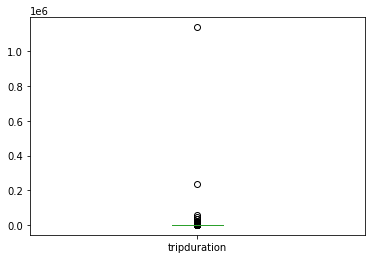

In [19]:
df["tripduration"].plot(kind="box");

    ·存在异常值，需要处理

In [20]:
df["tripduration"].describe()

count    6.427000e+03
mean     1.060471e+03
std      1.456811e+04
min      6.100000e+01
25%      3.490000e+02
50%      5.590000e+02
75%      9.320000e+02
max      1.139070e+06
Name: tripduration, dtype: float64

In [21]:
df["tripduration"].quantile(0.25)

349.0

In [22]:
IQR=df["tripduration"].quantile(0.75)-df["tripduration"].quantile(0.25)
Max=df["tripduration"].quantile(0.75)+1.5*IQR
Max

1806.5

In [23]:
df=df[df["tripduration"]<=Max]

### 2.2.4 station相关

In [24]:
#将id从int更改为字符型
df["from_station_id"]=df["from_station_id"].astype(str)
df["to_station_id"]=df["to_station_id"].astype(str)

### 2.2.5 usertype

In [25]:
df.usertype.unique()

array(['Subscriber', 'Customer'], dtype=object)

### 2.2.6 age

In [26]:
df.age.unique()

array(['37', '31', '30', '40', '25', '48', ' ', '28', '27', '34', '33',
       '26', '20', '23', '22', '54', '52', '57', '29', '39', '51', '55',
       '32', '49', '58', '42', '61', '35', '41', '63', '50', '38', '36',
       '43', '44', '19', '59', '45', '46', '56', '21', '24', '47', '66',
       '64', '62', '77', '69', '60', '68', '70', '53', '113', '73', '18',
       '67', '65', '71', '79', '17', '74', '72', '101'], dtype=object)

In [27]:
df[df["age"]==" "]

,user_id,start_time,end_time,timeduration,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age,dayofweek,hour
371796,21417733,2018-11-03 16:32:00,11/3/2018 16:54,22,983,1347,31,Franklin St & Chicago Ave,315,Elston Ave & Wabansia Ave,Customer,NaN,NaN,,5,16
92242,21090205,2018-10-08 12:10:00,10/8/2018 12:18,7,1582,453,341,Adler Planetarium,3,Shedd Aquarium,Customer,NaN,NaN,,0,12
331956,21371191,2018-10-30 18:42:00,10/30/2018 18:59,17,6267,1056,128,Damen Ave & Chicago Ave,342,Wolcott Ave & Polk St,Customer,NaN,NaN,,1,18
208326,21225619,2018-10-18 10:52:00,10/18/2018 11:17,24,4129,1465,97,Field Museum,35,Streeter Dr & Grand Ave,Customer,NaN,NaN,,3,10
46950,21037586,2018-10-04 00:41:00,10/4/2018 0:57,15,5393,956,31,Franklin St & Chicago Ave,181,LaSalle St & Illinois St,Customer,NaN,NaN,,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205299,21221955,2018-10-18 07:14:00,10/18/2018 7:31,17,6188,1063,176,Clark St & Elm St,47,State St & Kinzie St,Customer,NaN,NaN,,3,7
6782,20991669,2018-10-01 14:59:00,10/1/2018 15:17,18,2566,1093,3,Shedd Aquarium,195,Columbus Dr & Randolph St,Customer,NaN,NaN,,0,14
306859,21341969,2018-10-28 12:24:00,10/28/2018 12:45,20,718,1255,284,Michigan Ave & Jackson Blvd,97,Field Museum,Customer,NaN,NaN,,6,12
484317,21553590,2018-11-22 15:38:00,11/22/2018 15:59,20,762,1246,76,Lake Shore Dr & Monroe St,35,Streeter Dr & Grand Ave,Customer,NaN,NaN,,3,15


    ·age为空值是birthyear也是空值
    ·无法用birthyear补充age的空值

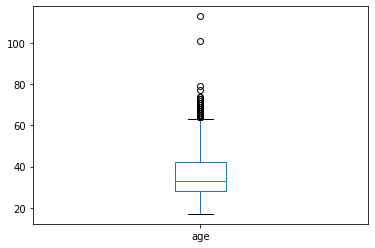

In [28]:
#观察age的异常值，为后续处理作准备
df[df["age"]!=" "]["age"].astype(int).plot(kind="box");

    ·有大量不合常理的异常值

In [29]:
#填充缺失值
age_median=int(df[df["age"]!=" "]["age"].astype(int).median())
age_median

33

In [30]:
df["age"]=df.age.str.replace(" ",str(age_median)).astype(int)

In [31]:
df["age"].describe()

count    5968.000000
mean       36.303619
std        10.851063
min        17.000000
25%        28.000000
50%        33.000000
75%        42.000000
max       113.000000
Name: age, dtype: float64

In [32]:
df["age"].quantile(0.25)

28.0

In [33]:
IQR_age=df["age"].quantile(0.75)-df["age"].quantile(0.25)
Max_age=df["age"].quantile(0.75)+1.5*IQR_age
Max_age

63.0

In [34]:
df=df[df["age"]<=63]

### 2.2.7 删除无关变量

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5853 entries, 439283 to 278179
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            5853 non-null   int64         
 1   start_time         5853 non-null   datetime64[ns]
 2   end_time           5853 non-null   object        
 3   timeduration       5853 non-null   int32         
 4   bikeid             5853 non-null   int64         
 5   tripduration       5853 non-null   int64         
 6   from_station_id    5853 non-null   object        
 7   from_station_name  5853 non-null   object        
 8   to_station_id      5853 non-null   object        
 9   to_station_name    5853 non-null   object        
 10  usertype           5853 non-null   object        
 11  gender             5548 non-null   object        
 12  birthyear          5561 non-null   float64       
 13  age                5853 non-null   int32         
 14  d

In [36]:
useless=["user_id","start_time","end_time","bikeid","from_station_name","to_station_name","birthyear"]
df=df.drop(useless,axis=1)

## 2.3 处理后数据查看

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5853 entries, 439283 to 278179
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   timeduration     5853 non-null   int32 
 1   tripduration     5853 non-null   int64 
 2   from_station_id  5853 non-null   object
 3   to_station_id    5853 non-null   object
 4   usertype         5853 non-null   object
 5   gender           5548 non-null   object
 6   age              5853 non-null   int32 
 7   dayofweek        5853 non-null   int64 
 8   hour             5853 non-null   int64 
dtypes: int32(2), int64(3), object(4)
memory usage: 411.5+ KB


In [38]:
df.describe()

,timeduration,tripduration,age,dayofweek,hour
count,5853.000000,5853.000000,5853.000000,5853.000000,5853.000000
mean,9.934393,625.527593,35.683752,2.513070,13.261746
std,6.339840,380.226556,9.970922,1.832262,4.749735
min,1.000000,61.000000,17.000000,0.000000,0.000000
25%,5.000000,336.000000,28.000000,1.000000,9.000000
50%,8.000000,521.000000,33.000000,2.000000,14.000000
75%,13.000000,828.000000,41.000000,4.000000,17.000000
max,30.000000,1805.000000,63.000000,6.000000,23.000000


# 3.单变量分析

## 3.1 数值变量

### 3.1.1 timeduration

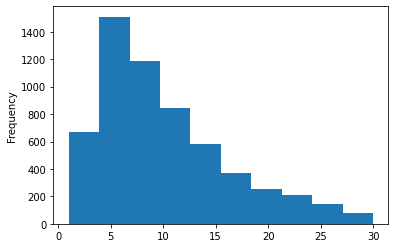

In [39]:
df["timeduration"].plot(kind="hist");

    ·数据主要集中分布在0~15分钟

### 3.1.2 tripduration

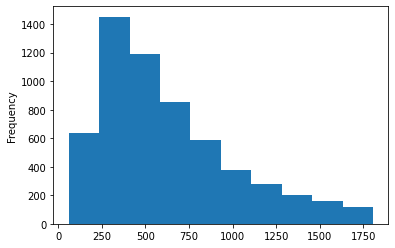

In [40]:
df["tripduration"].plot(kind="hist");

    ·数据集中分布在1000以内，符合“最后一公里”的目标

### 3.1.3 age

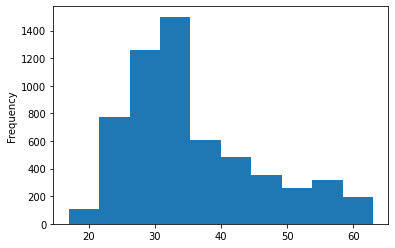

In [41]:
df["age"].plot(kind="hist");

    ·主要为25~40岁的人

## 3.2 分类变量

### 3.2.1 dayofweek

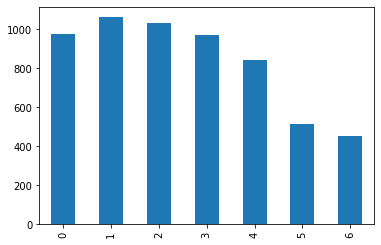

In [42]:
df["dayofweek"].value_counts().sort_index().plot(kind="bar");

    ·主要在工作日骑行

### 3.2.2 hour

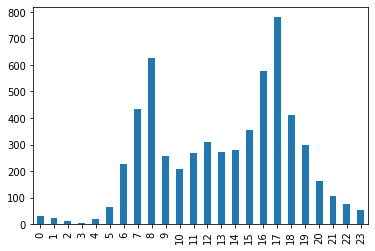

In [43]:
df["hour"].value_counts().sort_index().plot(kind="bar");

    ·骑行时间主要在上班和下班时间达到高峰

### 3.2.3 gender

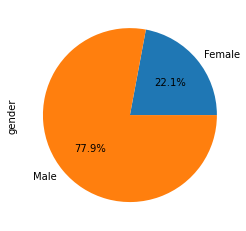

In [44]:
df["gender"].value_counts().sort_index().plot(kind="pie",autopct="%1.1f%%");

    ·男性客户占超过4/3

### 3.2.4 usertype

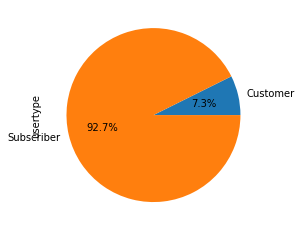

In [45]:
df["usertype"].value_counts().sort_index().plot(kind="pie",autopct="%1.1f%%");

    ·办理单车卡的用户占绝大多数

# 4. 多变量

## 4.1 将数值变量分类

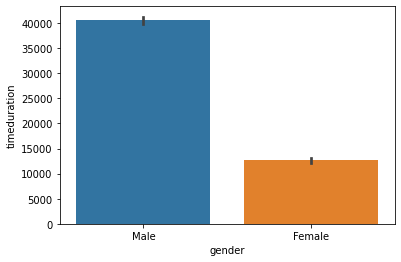

In [46]:
sns.barplot(x="gender",y="timeduration",data=df,estimator=sum);

    ·男性总骑行时长高于女性

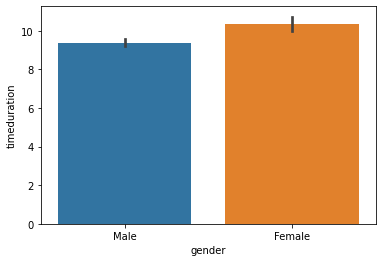

In [47]:
sns.barplot(x="gender",y="timeduration",data=df);

    ·但女性平均骑行时长高于男性

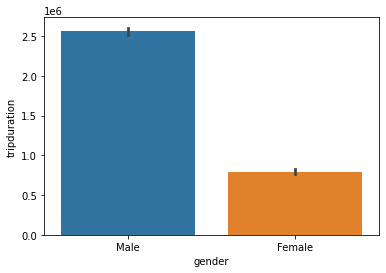

In [48]:
sns.barplot(x="gender",y="tripduration",data=df,estimator=sum);

    ·男性的总骑行里程高于女性

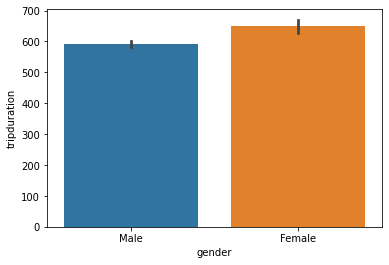

In [49]:
sns.barplot(x="gender",y="tripduration",data=df);

    ·但女性的平均骑行里程也高于男性

## 4.2 将分类变量分类

In [50]:
tmp=pd.DataFrame(df.groupby(["dayofweek","gender"])["hour"].count()).reset_index()
tmp

,dayofweek,gender,hour
0,0,Female,206
1,0,Male,720
2,1,Female,245
3,1,Male,786
4,2,Female,201
5,2,Male,799
6,3,Female,191
7,3,Male,738
8,4,Female,150
9,4,Male,665


In [51]:
tmp=tmp.rename(columns={'hour':'count'})
tmp

,dayofweek,gender,count
0,0,Female,206
1,0,Male,720
2,1,Female,245
3,1,Male,786
4,2,Female,201
5,2,Male,799
6,3,Female,191
7,3,Male,738
8,4,Female,150
9,4,Male,665


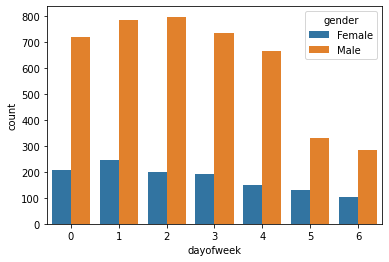

In [52]:
sns.barplot(x="dayofweek",y="count",hue="gender",data=tmp);

    ·男女在一周内骑行的趋势是统一的，工作日多而周末少

In [53]:
tmp=pd.DataFrame(df.groupby(["dayofweek","usertype"])["hour"].count()).reset_index()
tmp

,dayofweek,usertype,hour
0,0,Customer,69
1,0,Subscriber,906
2,1,Customer,46
3,1,Subscriber,1016
4,2,Customer,47
5,2,Subscriber,986
6,3,Customer,56
7,3,Subscriber,916
8,4,Customer,49
9,4,Subscriber,793


In [54]:
tmp=tmp.rename(columns={'hour':'count'})
tmp

,dayofweek,usertype,count
0,0,Customer,69
1,0,Subscriber,906
2,1,Customer,46
3,1,Subscriber,1016
4,2,Customer,47
5,2,Subscriber,986
6,3,Customer,56
7,3,Subscriber,916
8,4,Customer,49
9,4,Subscriber,793


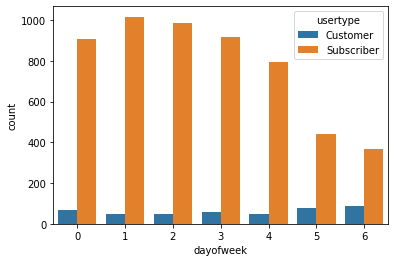

In [55]:
sns.barplot(x="dayofweek",y="count",hue="usertype",data=tmp);

    ·购买单车卡的用户在在工作日骑行多而周末少
    ·没有购买单车卡的用户在一周七天内骑行时间没有明显区别

# 5.建模

## 5.1 gender和usertype数据处理

In [56]:
df1=df.drop(["from_station_id","to_station_id"],axis=1)
df1.head()

,timeduration,tripduration,usertype,gender,age,dayofweek,hour
439283,7,436,Subscriber,Male,37,2,7
603317,7,445,Subscriber,Male,31,1,19
109957,18,1090,Customer,Male,30,1,12
428082,9,581,Subscriber,Female,30,0,12
395437,6,390,Subscriber,Male,40,2,7


In [57]:
df1=pd.get_dummies(df1,drop_first=True)
df1.head()

,timeduration,tripduration,age,dayofweek,hour,usertype_Subscriber,gender_Male
439283,7,436,37,2,7,1,1
603317,7,445,31,1,19,1,1
109957,18,1090,30,1,12,0,1
428082,9,581,30,0,12,1,0
395437,6,390,40,2,7,1,1


## 5.2 聚类分析

### 5.2.1 建立模型

In [58]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans as kms
from sklearn.metrics import silhouette_score

In [59]:
x=df1[["timeduration","tripduration","age","dayofweek","hour","usertype_Subscriber","gender_Male"]]
kms_3=kms(n_clusters=3,random_state=10)
model_3=kms_3.fit(x)

In [60]:
df1["cluster"]=model_3.labels_
df1.head()

,timeduration,tripduration,age,dayofweek,hour,usertype_Subscriber,gender_Male,cluster
439283,7,436,37,2,7,1,1,1
603317,7,445,31,1,19,1,1,1
109957,18,1090,30,1,12,0,1,0
428082,9,581,30,0,12,1,0,2
395437,6,390,40,2,7,1,1,1


### 5.2.2 用轮廓系数评估

In [61]:
pre_3=model_3.predict(x)
score_3=silhouette_score(x,pre_3)
print(score_3)

0.5927291085417886


### 5.2.3 优化

In [62]:
kms_4=kms(n_clusters=4,random_state=10)
model_4=kms_4.fit(x)

In [63]:
pre_4=model_4.predict(x)
score_4=silhouette_score(x,pre_4)
print(score_4)

0.5544459748009721


In [64]:
kms_5=kms(n_clusters=5,random_state=10)
model_5=kms_5.fit(x)

In [65]:
pre_5=model_5.predict(x)
score_5=silhouette_score(x,pre_5)
print(score_5)

0.5338770991550901


    ·分成3组是得分最高的

### 5.2.4 查看分群效果

In [66]:
df1.groupby(['cluster'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,831.0,35.854392,9.359705,18.0,30.0,33.0,40.0,63.0
1,3145.0,35.409857,10.052038,17.0,28.0,33.0,41.0,63.0
2,1877.0,36.067128,10.086871,17.0,29.0,33.0,41.0,63.0


    ·对年龄没有很好的分群效果

In [67]:
df1.groupby(['cluster'])['timeduration'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,831.0,22.216606,3.403579,17.0,19.0,22.0,25.0,30.0
1,3145.0,5.296979,1.963456,1.0,4.0,5.0,7.0,9.0
2,1877.0,12.266915,2.339892,9.0,10.0,12.0,14.0,17.0


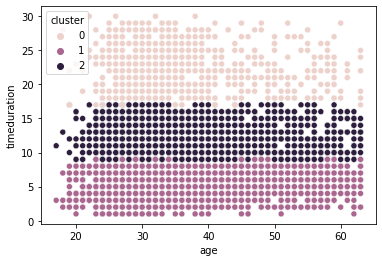

In [68]:
sns.scatterplot(x="age",y="timeduration",hue="cluster",data=df1);

    ·对timeduration分群效果不错

In [69]:
df1.groupby(['cluster'])['tripduration'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,831.0,1362.537906,203.515491,1064.0,1190.0,1328.0,1517.0,1805.0
1,3145.0,346.956439,116.665077,61.0,252.0,348.0,442.0,556.0
2,1877.0,765.991476,139.274957,557.0,644.0,748.0,877.0,1063.0


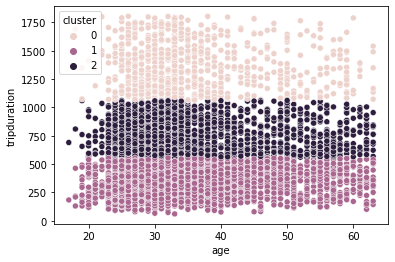

In [70]:
sns.scatterplot(x="age",y="tripduration",hue="cluster",data=df1);

    ·对tripduration分群效果不错

In [71]:
df1.groupby(['cluster'])['dayofweek'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,831.0,2.651023,1.984517,0.0,1.0,2.0,4.0,6.0
1,3145.0,2.478537,1.786007,0.0,1.0,2.0,4.0,6.0
2,1877.0,2.509856,1.836764,0.0,1.0,2.0,4.0,6.0


    ·对dayofweek分群效果不佳

In [72]:
df1.groupby(['cluster'])['hour'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,831.0,13.771360,4.514042,0.0,11.0,15.0,17.0,23.0
1,3145.0,13.120191,4.837452,0.0,8.0,14.0,17.0,23.0
2,1877.0,13.273308,4.689552,0.0,8.0,14.0,17.0,23.0


    ·对hour分群效果不佳

# 6.业务解读

    ·超过95%的用户办理了单车卡
    ·用户的主要使用时间在工作日，但没有购买单车卡的用户在周末与工作日的骑行时间没有明显差别
    ·男性用户多于女性用户，超过4/3 的男性用户
    ·男性总骑行时间和里程高于女性，但平均值小于女性
    
    ·分为3组时效果最佳
    ·仅对timeduration和tripduration两个连续型变量有较好的分群效果
    ·对其余变量分群效果均不佳
    ·timeduration被分为1~9,9~17,17~30三组
    ·tripduration被分为61~556,557~1063,1064~1805